In [2]:
import numpy as np 
import pandas as pd
from keras.datasets import mnist
from matplotlib import pyplot
import tensorflow as tf
import tensorflow_datasets as tfds

KeyboardInterrupt: 

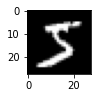

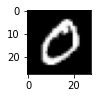

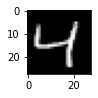

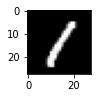

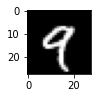

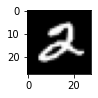

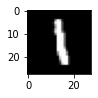

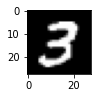

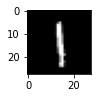

In [163]:
from matplotlib import pyplot
(train_X, train_y), (test_X, test_y) = mnist.load_data()
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

# Loading the Dataset

In [164]:
dataset_mnist, info_of_mnist=tfds.load(name='mnist',with_info=True, as_supervised=True)

In [165]:
dataset_mnist

{'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [166]:
info_of_mnist

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\Nishant Chauhan\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

### spliting data

In [167]:
X_train, X_test=dataset_mnist['train'],dataset_mnist['test']
X_validation_num = 0.1 * info_of_mnist.splits['train'].num_examples
#converting to int
X_validation_cast_num = tf.cast(X_validation_num, tf.int64)
#test
X_test_num = info_of_mnist.splits['test'].num_examples
num_test_samples = tf.cast(X_test_num,tf.int64)

#### scaling

In [168]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.

    return image, label

In [169]:
Scale_Val_data = X_train.map(scale)
Scale_test_data = X_test.map(scale)

### shuffling

In [170]:
Shuffled_Scale_Val_data=Scale_Val_data.shuffle(10000)
# final X validated and train data
X_val_data=Shuffled_Scale_Val_data.take(X_validation_cast_num)
X_train_data=Shuffled_Scale_Val_data.skip(X_validation_cast_num)

X_train_batch = X_train_data.batch(100)

X_val_batch = X_val_data.batch(X_validation_cast_num)

# batch the test data
test_data = Scale_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(X_val_batch))


# Creating the model

In [171]:
h=500 #var for hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(h, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(h, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])


### loss function

In [172]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [1]:
%%time
his=model.fit(X_train_batch, epochs=250, validation_data=(validation_inputs, validation_targets), verbose =2)

NameError: name 'model' is not defined

### Plot the error and classification accuracy on both training and validation data over the epochs.

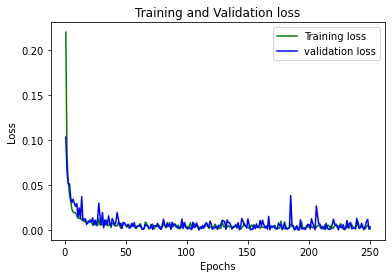

In [174]:
loss_train = his.history['loss']
loss_val = his.history['val_loss']
epochs = range(1,251)
pyplot.plot(epochs, loss_train, 'g', label='Training loss')
pyplot.plot(epochs, loss_val, 'b', label='validation loss')
pyplot.title('Training and Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

### Test

In [175]:
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 [==============================] - 0s 436ms/step - loss: 0.4447 - accuracy: 0.9840
Test loss: 0.44. Test accuracy: 98.40%


In [176]:
import cv2 as cv

the result is: 6


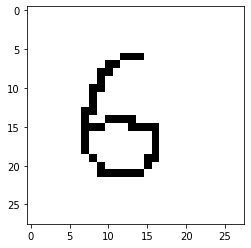

In [177]:
img=cv.imread('pratik.png')[:,:,0]
img=np.invert(np.array([img]))
prediction=model.predict(img)
print(f'the result is: {np.argmax(prediction)}')
pyplot.imshow(img[0],cmap=pyplot.cm.binary)
pyplot.show()

In [178]:
prediction

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## L2 regularization

In [179]:
from keras import regularizers
h=500                
model_l2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(h, activation='relu',kernel_regularizer=regularizers.l2(0.01)), # 1st hidden layer
    tf.keras.layers.Dense(h, activation='relu',kernel_regularizer=regularizers.l2(0.01)), # 2nd hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])


In [180]:
model_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [181]:
%%time
history_l2=model_l2.fit(X_train_batch, epochs=250, validation_data=(validation_inputs, validation_targets), verbose =2)

Epoch 1/250
540/540 - 6s - loss: 1.3256 - accuracy: 0.8949 - val_loss: 0.5304 - val_accuracy: 0.9242
Epoch 2/250
540/540 - 4888s - loss: 0.4986 - accuracy: 0.9247 - val_loss: 0.4739 - val_accuracy: 0.9243
Epoch 3/250
540/540 - 7s - loss: 0.4346 - accuracy: 0.9353 - val_loss: 0.4150 - val_accuracy: 0.9358
Epoch 4/250
540/540 - 7s - loss: 0.3915 - accuracy: 0.9429 - val_loss: 0.3702 - val_accuracy: 0.9453
Epoch 5/250
540/540 - 6s - loss: 0.3615 - accuracy: 0.9477 - val_loss: 0.3468 - val_accuracy: 0.9497
Epoch 6/250
540/540 - 6s - loss: 0.3400 - accuracy: 0.9500 - val_loss: 0.3384 - val_accuracy: 0.9527
Epoch 7/250
540/540 - 6s - loss: 0.3225 - accuracy: 0.9528 - val_loss: 0.3175 - val_accuracy: 0.9567
Epoch 8/250
540/540 - 5s - loss: 0.3086 - accuracy: 0.9544 - val_loss: 0.2948 - val_accuracy: 0.9608
Epoch 9/250
540/540 - 6s - loss: 0.2993 - accuracy: 0.9557 - val_loss: 0.2949 - val_accuracy: 0.9562
Epoch 10/250
540/540 - 5s - loss: 0.2898 - accuracy: 0.9569 - val_loss: 0.2799 - val_acc

Epoch 82/250
540/540 - 4s - loss: 0.2110 - accuracy: 0.9641 - val_loss: 0.2089 - val_accuracy: 0.9670
Epoch 83/250
540/540 - 4s - loss: 0.2100 - accuracy: 0.9641 - val_loss: 0.2065 - val_accuracy: 0.9643
Epoch 84/250
540/540 - 5s - loss: 0.2156 - accuracy: 0.9632 - val_loss: 0.2216 - val_accuracy: 0.9645
Epoch 85/250
540/540 - 5s - loss: 0.2080 - accuracy: 0.9657 - val_loss: 0.2128 - val_accuracy: 0.9660
Epoch 86/250
540/540 - 5s - loss: 0.2133 - accuracy: 0.9637 - val_loss: 0.2091 - val_accuracy: 0.9638
Epoch 87/250
540/540 - 5s - loss: 0.2110 - accuracy: 0.9643 - val_loss: 0.2163 - val_accuracy: 0.9630
Epoch 88/250
540/540 - 5s - loss: 0.2058 - accuracy: 0.9657 - val_loss: 0.2093 - val_accuracy: 0.9632
Epoch 89/250
540/540 - 5s - loss: 0.2127 - accuracy: 0.9636 - val_loss: 0.2115 - val_accuracy: 0.9643
Epoch 90/250
540/540 - 5s - loss: 0.2077 - accuracy: 0.9649 - val_loss: 0.2016 - val_accuracy: 0.9670
Epoch 91/250
540/540 - 5s - loss: 0.2131 - accuracy: 0.9637 - val_loss: 0.2062 - v

Epoch 162/250
540/540 - 7s - loss: 0.1926 - accuracy: 0.9674 - val_loss: 0.2197 - val_accuracy: 0.9598
Epoch 163/250
540/540 - 7s - loss: 0.1956 - accuracy: 0.9660 - val_loss: 0.2033 - val_accuracy: 0.9668
Epoch 164/250
540/540 - 7s - loss: 0.1931 - accuracy: 0.9661 - val_loss: 0.1949 - val_accuracy: 0.9682
Epoch 165/250
540/540 - 7s - loss: 0.1939 - accuracy: 0.9663 - val_loss: 0.2282 - val_accuracy: 0.9588
Epoch 166/250
540/540 - 7s - loss: 0.1965 - accuracy: 0.9658 - val_loss: 0.1901 - val_accuracy: 0.9685
Epoch 167/250
540/540 - 7s - loss: 0.1936 - accuracy: 0.9667 - val_loss: 0.2059 - val_accuracy: 0.9627
Epoch 168/250
540/540 - 7s - loss: 0.1971 - accuracy: 0.9657 - val_loss: 0.1984 - val_accuracy: 0.9673
Epoch 169/250
540/540 - 7s - loss: 0.1969 - accuracy: 0.9662 - val_loss: 0.2065 - val_accuracy: 0.9613
Epoch 170/250
540/540 - 7s - loss: 0.1965 - accuracy: 0.9658 - val_loss: 0.2007 - val_accuracy: 0.9655
Epoch 171/250
540/540 - 7s - loss: 0.1941 - accuracy: 0.9672 - val_loss: 

Epoch 242/250
540/540 - 5s - loss: 0.1900 - accuracy: 0.9673 - val_loss: 0.1824 - val_accuracy: 0.9707
Epoch 243/250
540/540 - 5s - loss: 0.1887 - accuracy: 0.9678 - val_loss: 0.2013 - val_accuracy: 0.9630
Epoch 244/250
540/540 - 5s - loss: 0.1883 - accuracy: 0.9687 - val_loss: 0.2114 - val_accuracy: 0.9585
Epoch 245/250
540/540 - 5s - loss: 0.1907 - accuracy: 0.9665 - val_loss: 0.1899 - val_accuracy: 0.9677
Epoch 246/250
540/540 - 5s - loss: 0.1875 - accuracy: 0.9680 - val_loss: 0.1947 - val_accuracy: 0.9670
Epoch 247/250
540/540 - 5s - loss: 0.1850 - accuracy: 0.9691 - val_loss: 0.2264 - val_accuracy: 0.9577
Epoch 248/250
540/540 - 5s - loss: 0.1908 - accuracy: 0.9665 - val_loss: 0.1963 - val_accuracy: 0.9657
Epoch 249/250
540/540 - 6s - loss: 0.1871 - accuracy: 0.9682 - val_loss: 0.1929 - val_accuracy: 0.9667
Epoch 250/250
540/540 - 6s - loss: 0.1859 - accuracy: 0.9681 - val_loss: 0.1812 - val_accuracy: 0.9712
Wall time: 1h 44min 41s


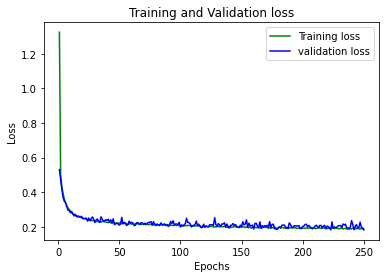

In [182]:
loss_train = history_l2.history['loss']
loss_val = history_l2.history['val_loss']
epochs = range(1,251)
pyplot.plot(epochs, loss_train, 'g', label='Training loss')
pyplot.plot(epochs, loss_val, 'b', label='validation loss')
pyplot.title('Training and Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [183]:
test_loss, test_accuracy = model_l2.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 [==============================] - 0s 233ms/step - loss: 0.1835 - accuracy: 0.9694
Test loss: 0.18. Test accuracy: 96.94%


## Dropout

In [184]:
from keras.layers.core import Dropout

In [185]:
h=500 #var for hidden layer
model_Dropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(h, activation='relu'),Dropout(0.25), # 1st hidden layer
    tf.keras.layers.Dense(h, activation='relu'),Dropout(0.25), # 2nd hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])


In [186]:
model_Dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [187]:
%%time
history_Dropout=model_Dropout.fit(X_train_batch, epochs=250, validation_data=(validation_inputs, validation_targets), verbose =2)

Epoch 1/250
540/540 - 5s - loss: 0.2632 - accuracy: 0.9205 - val_loss: 0.1163 - val_accuracy: 0.9645
Epoch 2/250
540/540 - 5s - loss: 0.1124 - accuracy: 0.9661 - val_loss: 0.0880 - val_accuracy: 0.9727
Epoch 3/250
540/540 - 5s - loss: 0.0824 - accuracy: 0.9737 - val_loss: 0.0527 - val_accuracy: 0.9838
Epoch 4/250
540/540 - 5s - loss: 0.0654 - accuracy: 0.9794 - val_loss: 0.0499 - val_accuracy: 0.9845
Epoch 5/250
540/540 - 5s - loss: 0.0553 - accuracy: 0.9824 - val_loss: 0.0472 - val_accuracy: 0.9848
Epoch 6/250
540/540 - 5s - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.0427 - val_accuracy: 0.9857
Epoch 7/250
540/540 - 5s - loss: 0.0436 - accuracy: 0.9860 - val_loss: 0.0315 - val_accuracy: 0.9892
Epoch 8/250
540/540 - 5s - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0281 - val_accuracy: 0.9910
Epoch 9/250
540/540 - 5s - loss: 0.0358 - accuracy: 0.9881 - val_loss: 0.0279 - val_accuracy: 0.9920
Epoch 10/250
540/540 - 5s - loss: 0.0339 - accuracy: 0.9886 - val_loss: 0.0233 - val_accura

Epoch 82/250
540/540 - 5s - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 83/250
540/540 - 5s - loss: 0.0119 - accuracy: 0.9974 - val_loss: 0.0027 - val_accuracy: 0.9990
Epoch 84/250
540/540 - 5s - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.0011 - val_accuracy: 0.9993
Epoch 85/250
540/540 - 5s - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 86/250
540/540 - 5s - loss: 0.0119 - accuracy: 0.9972 - val_loss: 0.0025 - val_accuracy: 0.9992
Epoch 87/250
540/540 - 5s - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 88/250
540/540 - 5s - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0049 - val_accuracy: 0.9985
Epoch 89/250
540/540 - 5s - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0020 - val_accuracy: 0.9993
Epoch 90/250
540/540 - 5s - loss: 0.0105 - accuracy: 0.9973 - val_loss: 4.1414e-04 - val_accuracy: 1.0000
Epoch 91/250
540/540 - 5s - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.0018

Epoch 161/250
540/540 - 6s - loss: 0.0088 - accuracy: 0.9981 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 162/250
540/540 - 5s - loss: 0.0085 - accuracy: 0.9984 - val_loss: 2.7436e-04 - val_accuracy: 1.0000
Epoch 163/250
540/540 - 6s - loss: 0.0109 - accuracy: 0.9978 - val_loss: 0.0018 - val_accuracy: 0.9993
Epoch 164/250
540/540 - 6s - loss: 0.0110 - accuracy: 0.9980 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 165/250
540/540 - 5s - loss: 0.0066 - accuracy: 0.9986 - val_loss: 2.4129e-04 - val_accuracy: 1.0000
Epoch 166/250
540/540 - 5s - loss: 0.0095 - accuracy: 0.9983 - val_loss: 0.0049 - val_accuracy: 0.9995
Epoch 167/250
540/540 - 5s - loss: 0.0087 - accuracy: 0.9984 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 168/250
540/540 - 6s - loss: 0.0114 - accuracy: 0.9981 - val_loss: 1.6456e-04 - val_accuracy: 1.0000
Epoch 169/250
540/540 - 7s - loss: 0.0092 - accuracy: 0.9983 - val_loss: 2.0003e-04 - val_accuracy: 1.0000
Epoch 170/250
540/540 - 7s - loss: 0.0091 - accuracy: 0.9

Epoch 239/250
540/540 - 7s - loss: 0.0111 - accuracy: 0.9982 - val_loss: 0.0048 - val_accuracy: 0.9995
Epoch 240/250
540/540 - 7s - loss: 0.0073 - accuracy: 0.9985 - val_loss: 4.8332e-04 - val_accuracy: 0.9997
Epoch 241/250
540/540 - 7s - loss: 0.0113 - accuracy: 0.9984 - val_loss: 2.0709e-04 - val_accuracy: 0.9998
Epoch 242/250
540/540 - 9s - loss: 0.0099 - accuracy: 0.9987 - val_loss: 0.0015 - val_accuracy: 0.9997
Epoch 243/250
540/540 - 7s - loss: 0.0083 - accuracy: 0.9987 - val_loss: 8.1281e-04 - val_accuracy: 0.9998
Epoch 244/250
540/540 - 7s - loss: 0.0120 - accuracy: 0.9984 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 245/250
540/540 - 7s - loss: 0.0109 - accuracy: 0.9982 - val_loss: 6.3353e-05 - val_accuracy: 1.0000
Epoch 246/250
540/540 - 7s - loss: 0.0114 - accuracy: 0.9982 - val_loss: 7.3304e-05 - val_accuracy: 1.0000
Epoch 247/250
540/540 - 7s - loss: 0.0060 - accuracy: 0.9990 - val_loss: 1.0673e-04 - val_accuracy: 1.0000
Epoch 248/250
540/540 - 7s - loss: 0.0076 - accur

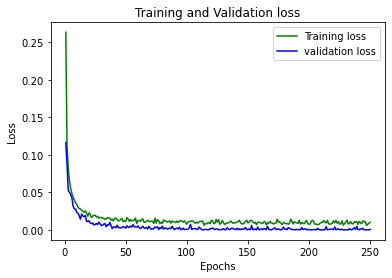

In [188]:
loss_train = history_Dropout.history['loss']
loss_val = history_Dropout.history['val_loss']
epochs = range(1,251)
pyplot.plot(epochs, loss_train, 'g', label='Training loss')
pyplot.plot(epochs, loss_val, 'b', label='validation loss')
pyplot.title('Training and Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [189]:
test_loss, test_accuracy = model_Dropout.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 [==============================] - 0s 310ms/step - loss: 0.2340 - accuracy: 0.9857
Test loss: 0.23. Test accuracy: 98.57%


## Early stopping

In [190]:
from keras.callbacks import EarlyStopping

In [191]:
h=500 #var for hidden layer
model_ES = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(h, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(h, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])


In [192]:
model_ES.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [193]:
# a=EarlyStopping(monitor='val_loss', patience=5)

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# trained_model_5d = model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(x_test, y_test)
#  , callbacks = [EarlyStopping(monitor='val_acc', patience=2)])

In [194]:
%%time
history_ES=model_ES.fit(X_train_batch, epochs=250, validation_data=(validation_inputs, validation_targets), verbose =2,
callbacks = [EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/250
540/540 - 7s - loss: 0.2183 - accuracy: 0.9351 - val_loss: 0.1204 - val_accuracy: 0.9645
Epoch 2/250
540/540 - 7s - loss: 0.0816 - accuracy: 0.9748 - val_loss: 0.0641 - val_accuracy: 0.9810
Epoch 3/250
540/540 - 5s - loss: 0.0549 - accuracy: 0.9822 - val_loss: 0.0522 - val_accuracy: 0.9822
Epoch 4/250
540/540 - 6s - loss: 0.0389 - accuracy: 0.9874 - val_loss: 0.0648 - val_accuracy: 0.9807
Epoch 5/250
540/540 - 7s - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0473 - val_accuracy: 0.9865
Epoch 6/250
540/540 - 7s - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.0304 - val_accuracy: 0.9907
Epoch 7/250
540/540 - 8s - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0332 - val_accuracy: 0.9907
Epoch 8/250
540/540 - 5s - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0253 - val_accuracy: 0.9928
Epoch 9/250
540/540 - 6s - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 10/250
540/540 - 7s - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0201 - val_accura

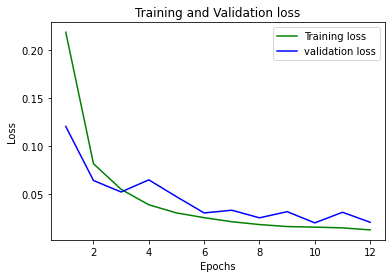

In [196]:
loss_train = history_ES.history['loss']
loss_val = history_ES.history['val_loss']
epochs = range(1,13)
pyplot.plot(epochs, loss_train, 'g', label='Training loss')
pyplot.plot(epochs, loss_val, 'b', label='validation loss')
pyplot.title('Training and Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [197]:
test_loss, test_accuracy = model_ES.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 [==============================] - 0s 195ms/step - loss: 0.0873 - accuracy: 0.9825
Test loss: 0.09. Test accuracy: 98.25%
